# Data Analysis (Econ 378)
## Trevor Andrus

# SECTION 1 - Data Collection & Summary



## Part 1 : Collect Data of Interest

Import Packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.proportion import proportion_confint
import statistics as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Read in data

In [6]:
df = pd.read_table("~/Downloads/amazon-books.txt")
df.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [7]:
df["DifferenceInPrice"] = df["List Price"] - df["Amazon Price"]

This dataset features 325 books on amazon with accompanying information. The Data was scraped from Amazon.com, and can be found at the following link: https://dasl.datadescription.com/datafile/amazon-books/?_sfm_methods=Multiple+Regression&_sfm_cases=4+59943
Being only 325 books, this is obviously only a sample of Amazon's book catalogue, but it can help us understand what factors go into Amazon's pricing. 

The variables featured in the dataset are as follows:

Title: Categorical - A character string of the title of book

Author: Categorical - A character string of the author's first and last name

List Pirce: Quantitative - A numeric value representing the list price for each book

Amazon Price: Quantitative - A numeric value representing the price of each book on Amazon.com

Hard/Paper: Categorical (Binary) - A Character (either P or H) representing a paper back or hard back book

NumPages: Quantitative - A numeric value representing the number of pages each book has

Publisher: Categorical - A character string of the publisher's name

Pub Year: Quantitative - A numeric value representing the year of publication

ISBN-10: Quantitative - A numeric value representing the unique book identification number

Height: Quantitative - A numeric value measuring book height (in inches)

Width: Quantitative - A numeric value measuring book width (in inches)

Thick: Quantitative - A numeric value measuring book thickness (in inches)

Weight(oz): Quantitative - A numeric value measuring book weight (in ounces)


In addition to the original variables, I added the following:

DifferenceInPrice: Quantitative - A numeric value representing the difference between Amazon and List Prices

## Part 2 : Identify your Audience

Parties that may find this analysis interesting include: Publishers, authors, book stores, and online retail stores. 

Possible questions to be answered:
What factor has the most significant effect on book price?
Is a longer book (with more pages) generally more expensive?
Are bigger books (with greater height and width) more expensive?
Is there a significant difference in Amazon's price and the list price of a particular book?

## Part 3 : Summarize individual variables

### Analysis of Binary variable

Number of books that are hard / paper back (236 / 325 hardback, 89 / 325 paperback)

In [4]:
df["Hard/ Paper"].value_counts()

P    236
H     89
Name: Hard/ Paper, dtype: int64

Creating indivdual tables of hardback books and paper back books

In [5]:
Hardback = df[df["Hard/ Paper"] == 'H']
Paperback = df[df["Hard/ Paper"] == 'P']

Finding the conditional means, standard deviations, minimums, maximums and quartiles of each style of book:

Hardback:

In [6]:
Hardback.describe()

,List Price,Amazon Price,NumPages,Pub year,Height,Width,Thick,Weight (oz),DifferenceInPrice
count,89.000000,89.000000,87.000000,89.000000,85.000000,85.000000,88.000000,80.00000,89.000000
mean,22.393933,14.637640,342.229885,2002.955056,8.500000,5.969412,1.126136,16.08000,7.756292
std,12.387645,10.328102,180.779173,13.344142,1.212534,0.981134,0.410353,7.29141,5.338775
min,4.990000,4.990000,24.000000,1936.000000,5.100000,4.100000,0.300000,1.20000,-2.480000
25%,16.990000,10.580000,209.500000,2002.000000,7.900000,5.300000,0.875000,11.20000,5.760000
50%,20.000000,13.490000,336.000000,2009.000000,8.600000,6.000000,1.100000,16.00000,7.570000
75%,26.950000,15.820000,424.000000,2011.000000,9.300000,6.400000,1.400000,22.40000,10.540000
max,98.950000,98.950000,880.000000,2011.000000,12.100000,9.500000,2.100000,35.20000,35.550000


Paperback:

In [7]:
Paperback.describe()

,List Price,Amazon Price,NumPages,Pub year,Height,Width,Thick,Weight (oz),DifferenceInPrice
count,235.000000,236.000000,236.000000,235.000000,236.000000,235.000000,236.000000,236.000000,235.000000
mean,17.135234,12.842161,333.508475,2001.923404,8.041949,5.445957,0.826271,11.270339,4.741447
std,14.665236,14.798254,154.830436,9.417347,0.753699,0.789200,0.316074,5.952133,3.950758
min,1.500000,0.770000,32.000000,1955.000000,5.200000,4.100000,0.100000,1.300000,-0.300000
25%,12.990000,8.275000,208.000000,1998.000000,7.875000,5.200000,0.600000,7.150000,2.745000
50%,15.000000,10.040000,320.000000,2004.000000,8.000000,5.300000,0.800000,10.150000,4.800000
75%,16.000000,11.080000,406.750000,2009.000000,8.300000,5.500000,1.000000,14.400000,6.400000
max,139.950000,139.950000,896.000000,2011.000000,11.000000,9.300000,1.800000,32.000000,32.340000


As is probably expected, hardback books are heavier, thicker, and more expensive on average. 

### Analysis of Quantitative Variables

Finding the means, standard deviations, minimums, maximums and quartiles of all quantitative variables

In [8]:
df.describe()

,List Price,Amazon Price,NumPages,Pub year,Height,Width,Thick,Weight (oz),DifferenceInPrice
count,324.000000,325.000000,323.000000,324.000000,321.000000,320.000000,324.000000,316.000000,324.000000
mean,18.579753,13.333846,335.857585,2002.206790,8.163240,5.585000,0.907716,12.487975,5.569599
std,14.252829,13.727679,161.984389,10.629002,0.918739,0.874057,0.368625,6.644648,4.570515
min,1.500000,0.770000,24.000000,1936.000000,5.100000,4.100000,0.100000,1.200000,-2.480000
25%,13.950000,8.600000,208.000000,1998.000000,7.900000,5.200000,0.600000,7.800000,2.800000
50%,15.000000,10.200000,320.000000,2005.000000,8.100000,5.400000,0.900000,11.200000,5.420000
75%,19.950000,13.130000,416.000000,2010.000000,8.500000,5.900000,1.100000,16.000000,7.240000
max,139.950000,139.950000,896.000000,2011.000000,12.100000,9.500000,2.100000,35.200000,35.550000


In [9]:
df.isnull().sum()

Title                0
Author               1
List Price           1
Amazon Price         0
Hard/ Paper          0
NumPages             2
Publisher            1
Pub year             1
ISBN-10              0
Height               4
Width                5
Thick                1
Weight (oz)          9
DifferenceInPrice    1
dtype: int64

As can be seen from the two previous tables, there are some missing values in the data - I will now drop the rows that do not have data for every variable

(While there are many ways to deal with null values, in this case dropping rows will have little significant effect on the outcome, and this project - being an academic example - will not suffer greatly from the loss in data. 

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 324
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              310 non-null    object 
 1   Author             310 non-null    object 
 2   List Price         310 non-null    float64
 3   Amazon Price       310 non-null    float64
 4   Hard/ Paper        310 non-null    object 
 5   NumPages           310 non-null    float64
 6   Publisher          310 non-null    object 
 7   Pub year           310 non-null    float64
 8   ISBN-10            310 non-null    object 
 9   Height             310 non-null    float64
 10  Width              310 non-null    float64
 11  Thick              310 non-null    float64
 12  Weight (oz)        310 non-null    float64
 13  DifferenceInPrice  310 non-null    float64
dtypes: float64(9), object(5)
memory usage: 36.3+ KB


After dropping the rows with null values, we have 310 total observations remaining.

Creating historgrams to see the distributions of individual variables:

Text(0.5, 0, 'Dollars')

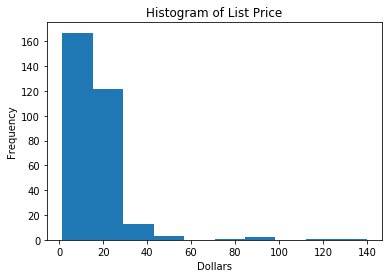

In [12]:
plt.hist(df["List Price"])
plt.title("Histogram of List Price")
plt.ylabel("Frequency")
plt.xlabel("Dollars")

Text(0.5, 0, 'Dollars')

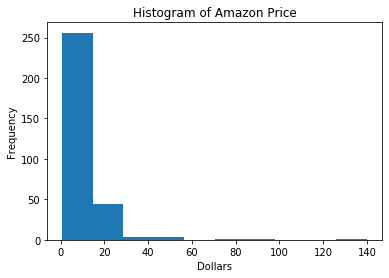

In [13]:
plt.hist(df["Amazon Price"])
plt.title("Histogram of Amazon Price")
plt.ylabel("Frequency")
plt.xlabel("Dollars")

Text(0.5, 0, 'Number of Pages')

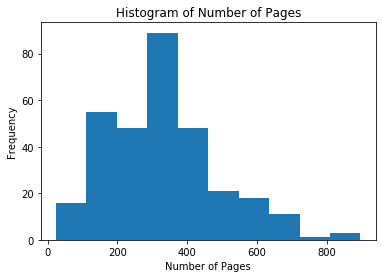

In [14]:
plt.hist(df["NumPages"])
plt.title("Histogram of Number of Pages")
plt.ylabel("Frequency")
plt.xlabel("Number of Pages")

Text(0.5, 0, 'year')

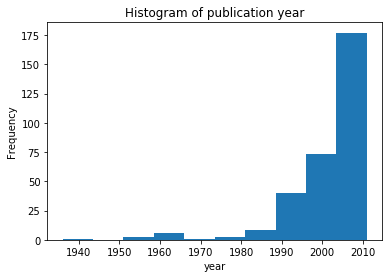

In [15]:
plt.hist(df["Pub year"])
plt.title("Histogram of publication year")
plt.ylabel("Frequency")
plt.xlabel("year")

Text(0.5, 0, 'difference')

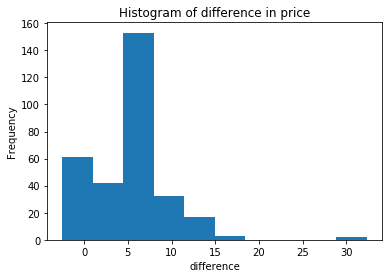

In [16]:
plt.hist(df["DifferenceInPrice"])
plt.title("Histogram of difference in price")
plt.ylabel("Frequency")
plt.xlabel("difference")

In [17]:
.95264 **2

0.9075229696000001

## Part 4 : Correlation and Causation

The two variables I will analyze for correlation are list price and Amazon price. Common sense tells us that more expensive books sold at one retailer will in turn be expensive elsewhere. I expect Amazon price and list price to share a strong positive correlation (maybe around .8) - I expect that as list price increases, Amazon price will also increase proportionally. Although reverse correlation may be possible, I don't think it is likely. Unless a book is being repriced, I think generally the list price will be set before the Amazon price (and therefore the Amazon price can not directly affect the list price). I think there are plenty of factors that may play a role in causing both list and Amazon price to move - while we already have some in the data (such as number of pages and height) another couple variables that may contribute to price changes are: language, scarcity, popularity, and genre. In order to see the effects of each of these variables, further data would need to be collected on each book. 

Computing correlation coefficient:

In [18]:
np.corrcoef(df["List Price"], df["Amazon Price"])[0, 1]

0.9526496138344526

While I correctly guessed the sign of the correlation, the two price variables were more strongly correlated than I anticipated - a correlation coefficient of .952 represents a very strong positive correlation, and an accompanying r-squared value suggests that .9075 or 90% of the variation in amazon price can be described by list price. 

## Part 5: Graphical summary

Text(0.5, 0, 'List Price')

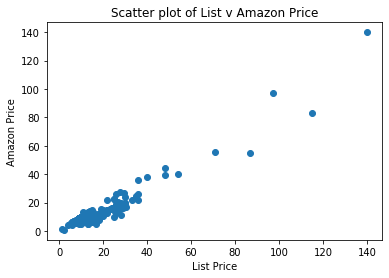

In [19]:
plt.scatter(df["List Price"], df["Amazon Price"])
plt.title("Scatter plot of List v Amazon Price")
plt.ylabel("Amazon Price")
plt.xlabel("List Price")

As can be seen in both the scatterplot and in the correlation coefficient from earlier, the two variables share a strong positive linear relationship (As list price increases, Amazon price also increases proportionally).

Now let's take a look at a scatterplot differentiated by book type - paperback books in read, hardback books in blue. 

Text(0.5, 0, 'List Price')

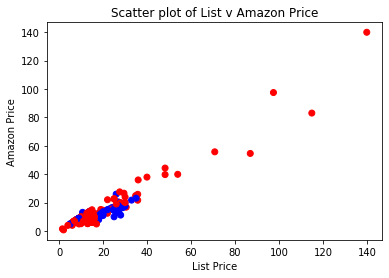

In [20]:
colors = {'P':'red', 'H':'blue'}
plt.scatter(df["List Price"], df["Amazon Price"], c= df["Hard/ Paper"].map(colors))
plt.title("Scatter plot of List v Amazon Price")
plt.ylabel("Amazon Price")
plt.xlabel("List Price")

Interestingling, even though we saw that the conditional prices of paperback books were on average lower than hardback books, a few outliers of the most expensive books are paperback. 

## Part 6 EXTRA : MULTIPLE LINEAR REGRESSION 

I ran out of time to finish checking all of the assumptions for multiple regression, but went ahead and did it anyway for curiosity's sake under the regression section. 

### ASSUMPTIONS:
### Linearity, Independence, No multicollinearity, Homoscedasity, No Influencial points

### 1. Linearity

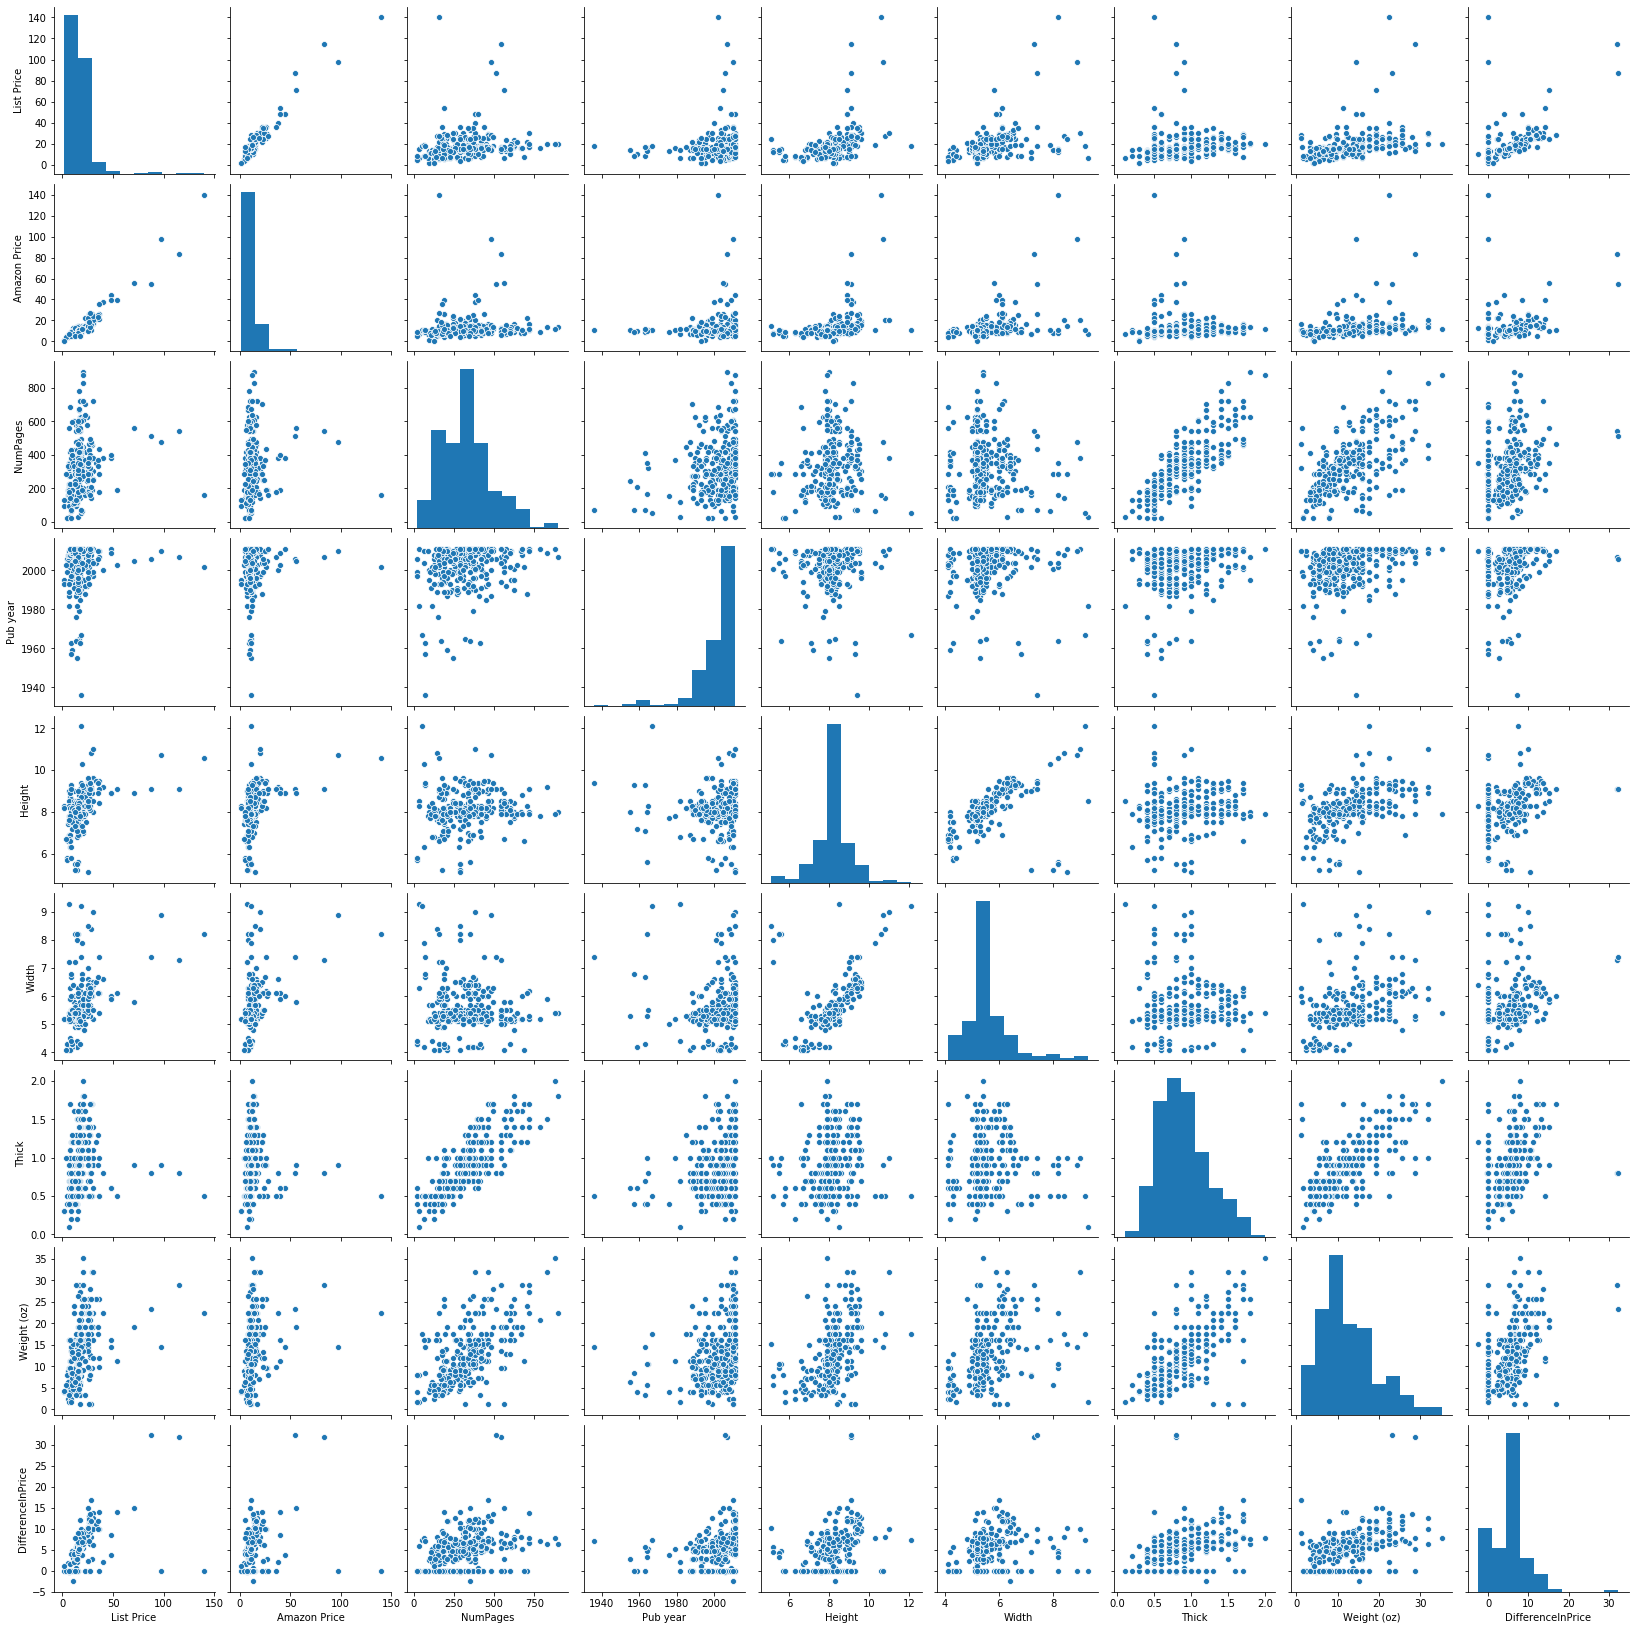

In [21]:
#Scatter plot matrix
sns.pairplot(df)

Looking at the scatterplot matrix, we see no relationships between variables other than linear, so we will continue as if the assumption were met. 

### 2. Independence
Because we don't have a lot of information about this data, there is no way to definitively say whether the data is independent or not - we don't know if this is a randomly collected sample. However, we will continue as if the assumption is met (because we can assume the price of one book does not affect another). 

### 3. Independence

### 4. Homoscedasity of Residuals

### 5. No Influencial points

# SECTION 2 - Statistical Inference

## 1 - Means

### Point Estimate

For my point estimate, I chose to use the method of moments approximation for the mean of Amazon price. (By the method of moments, we can approximate the population mean using the sample mean (calculations shown below)

In [22]:
print("Point estimate for the mean of Amazon Price: ", df["Amazon Price"].mean())

Point estimate for the mean of Amazon Price:  12.587645161290308


### Confidence Interval

For the confidence interval for the above mean, I chose to use a 95% confidence interval. While I could have done the calculations manually, I chose to try and apply the t.interval function from Python's "scipy.stats" package below. 


In [23]:
# Parameters:
#        alpha - specify confidence level
#        df - degrees of freedom
#        loc - location (where to place middle of interval) - in this case the mean
#        scale - defining standard error using the sem() function

CI = st.t.interval(alpha=0.95, df=len(df["Amazon Price"])-1, loc=np.mean(df["Amazon Price"]), scale=st.sem(df["Amazon Price"])) 
print("95% Confidence interval for mean Amazon Price: ", CI)

95% Confidence interval for mean Amazon Price:  (11.293635952521903, 13.881654370058712)


### Hypothesis Test

For the example of a hypothesis test, it seems a little counterintuitve to do a test for a mean that I already know, so I will use a different value than Amazon price. One thing that might be interesting to know is if list price greatly differs from Amazon price. I will conduct a hypothesis test with the following hypotheses:


H0: The mean of Amazon price is equal to the mean of List price


HA: The mean of Amazon price is not equal to the mean of List price


I will again use the "scipy.stats" package instead of doing the calculations by hand. 

In [24]:
Ttest = st.ttest_ind(df["Amazon Price"], df["List Price"], equal_var=False)
print("Test Statistic :" + str(Ttest[0]) + "\n" + "P-Value: " + str(Ttest[1]))

Test Statistic :-5.341522418753552
P-Value: 1.3052936754685143e-07


With a p-Value of 1.3052936754685143e-07 and at an alpha level of .05, we reject the null hypothesis - we have sufficienct evidence to conclude that the mean Amazon price is not equal to the mean List price for books. 

## 2 - Standard Deviation

### Point Estimate

For my point estimate I will again use the sample statistic to estimate the population parameter. In this case, I will use the sample standard deviation of Amazon price to estimate the population standard deviation. 

In [25]:
print("Point estimate for standard deviation of Amazon Price", str(stats.stdev((df["Amazon Price"]))))

Point estimate for standard deviation of Amazon Price 11.578858703276664


### Confidence Interval / Hypothesis Test

For the confidence interval and hypothesis test, I couldn't find any open source functions to apply, so I write my own below. I tested at alpha = .05, and the value for the hypothesis test that I chose was the mean of Amazon price - I wanted to see if the mean was significantly higher than the standard deviation. 

H0: The mean is not greater than the standard deviation

HA: The mean is greater than the standard deviation

In [51]:
def sd_test (data, alpha, estimate):
    
    
    n = len(data)
    var = stats.stdev(data) ** 2
    varhat = estimate ** 2
    
    # confidence interval
    Upper = np.sqrt( var * (n-1) * ( 1 / st.chi2.ppf( (alpha / 2), n - 1)) )
    Lower = np.sqrt( var * (n-1) * (1 / st.chi2.ppf( 1 - (alpha / 2), n - 1)) )
    
    # hypothesis test
    
    testStat = (var / varhat) * (n-1)
    pVal = (st.chi2.cdf(testStat, n-1))
    
    if pVal > alpha:
        significant = 0
        conclusion = "Because our P-value of " + str(pVal) + " is greater than our alpha level of " + str(alpha) + ", We fail to reject the null hypothesis - the mean of " + str(estimate) + " may not be significantly greater than the standard deviation."
    elif pVal < alpha:
        significant = 1
        conclusion = "Because our P-value of " + str(pVal) + " is less than our alpha level of " + str(alpha) + ", We reject the null hypothesis - the mean of " + str(estimate) + " is significantly greater than the standard deviation of " + str(np.sqrt(var)) + " ."
    
    print("Hypothesis Test: \n" + conclusion + "\nConfidence interval: \n" + "(" + str(Lower) + ", " + str(Upper) + ")")


    

In [52]:
sd_test(df["Amazon Price"], .05, df["Amazon Price"].mean())

Hypothesis Test: 
Because our P-value of 0.02311910345350128 is less than our alpha level of 0.05, We reject the null hypothesis - the mean of 12.587645161290308 is significantly greater than the standard deviation of 11.578858703276664 .
Confidence interval: 
(10.733499974605241, 12.569877129916508)


## 3 - Proportions

### Point Estimate

For my point estimate for proportions, I again chose to use the method of moments approximation for the proportion of books that are hardback. (By the method of moments, we can approximate the population proportion using the sample proportion (calculations shown below)

In [31]:
# create a dataframe holding the value counts of paper and hard back
HP = df["Hard/ Paper"].value_counts().rename_axis('Type').reset_index(name='counts')
HP

,Type,counts
0,P,232
1,H,78


In [32]:
print("Point estimate for the proportion of books that are hardback: " + str((HP["counts"][1] / sum(HP["counts"]))))

Point estimate for the proportion of books that are hardback: 0.25161290322580643


### Confidence Interval

Again for the confidence interval I chose to use some Python stats libraries to make myself more familiar with the open source functions people have already written. 

In [33]:
CI = proportion_confint(count=89,    # Number of "successes"
                   nobs=325,         # Number of trials
                   alpha=(.05))      # Confidence level (alpha)
print("95% Confidence interval for proportion of books that are hardback:\n", CI)

95% Confidence interval for proportion of books that are hardback:
 (0.22536487643250597, 0.32232743125980173)


## 4 - Difference in Means

### Point Estimate

For my point estimate for difference in means, I again chose to use the method of moments approximation for the the mean difference in amazon price between hard and paperback books. (By the method of moments, we can approximate the population mean using the sample mean (calculations shown below)

In [34]:
# creating two variables holding the subpopulation means
paperAverage = np.mean(df["Amazon Price"][df["Hard/ Paper"] == "P"])
hardAverage = np.mean(df["Amazon Price"][df["Hard/ Paper"] == "H"])
### Confidence Interval / Hypothesis Testprint("Hardback average Amazon Price: " + str(hardAverage) + "\nPaperback average Amazon Price: " + str(paperAverage))
print("Point estimate for the average difference in the mean Amazon Price of paper and hard back books:\n " + str(paperAverage - hardAverage))

Hardback average Amazon Price: 12.962820512820521
Paperback average Amazon Price: 12.461508620689655
Point estimate for the average difference in the mean Amazon Price of paper and hard back books:
 -0.5013118921308664


### Confidence Interval

I again used the same open source function as the previous confidence interval for means to find the confidence interval for the difference in means.

In [35]:
# creating a table of differences and adjusting the index
dif1 = df["Amazon Price"][df["Hard/ Paper"] == "P"]
dif2 = df["Amazon Price"][df["Hard/ Paper"] == "H"]
dif1 = dif1.reset_index()
dif1 = dif1.drop(["index"], axis=1)
dif2 = dif2.reset_index()
dif2 = dif2.drop(["index"], axis=1)
dif = dif1 - dif2
dif = dif.dropna()

In [36]:
CI = st.t.interval(alpha=0.95, df=len(dif["Amazon Price"])-1, loc=(paperAverage - hardAverage), scale=st.sem(dif["Amazon Price"])) 
print("95% Confidence interval for mean difference in Amazon Price between \npaper and hardback books: ", CI)

95% Confidence interval for mean difference in Amazon Price between 
paper and hardback books:  (-4.846638035499705, 3.8440142512379722)


### Hypothesis Test

I conduct a hypothesis test with the following hypotheses below:


H0: The mean of Amazon price for paperback books is equal to the mean of Amazon price for hardback books


HA: The two means are not equal


I will again use the "scipy.stats" package instead of doing the calculations by hand. 

In [37]:
Ttest = st.ttest_ind(df["Amazon Price"][df["Hard/ Paper"] == "P"], df["Amazon Price"][df["Hard/ Paper"] == "H"])
print("Test Statistic :" + str(Ttest[0]) + "\n" + "P-Value: " + str(Ttest[1]))

Test Statistic :-0.3303130463988215
P-Value: 0.741388001782799


As we can see from both the confidence interval (which contains 0) and the hypothesis test (which returns an insigniciant p-value of .293), we lack the necessary evidence to conclude that there is a significant difference in mean price between paperback and hardback books. 

## 5 - Ratio of Standard Deviations

For the ratio of standard deviations, I partitioned by page number - I want to see if there is a different in stanadard deviations between the prices of long and short books. 

In [12]:
longBooks = df[df["NumPages"] > 350]
shortBooks = df[df["NumPages"] <= 350]

### Point Estimate

I again use the method of moments approximation, and use the sample statistic to estimate the population parameter.

In [67]:
print("Point estimate for the ratio of standard deviations of long and short books' Amazon Price:\n" + str( (stats.stdev(longBooks["Amazon Price"]) / stats.stdev(shortBooks["Amazon Price"])) ) )

Point estimate for the ratio of standard deviations of long and short books' Amazon Price:
1.1315486588518666


### Confidence Interval / Hypothesis Test

For the confidence interval for difference in proportions, I couldn't find a very good open source function, so I write my own below that creates both the confidence interval and the Hypothesis test at the same time. I will use an alpha of .95, and my hypotheses are as follows:

H0: The standard deviation of amazon price midst long books is not more than 10% greater than that of short books

H1: The standard deviation of amazon price midst long books is more than 10% greater than that of short books

In [13]:
def ratio_test(data1, data2, ratioEstimate, alpha):
    
    n1 = len(data1)
    n2 = len(data2)
    var1 = stats.stdev(data1) ** 2
    var2 = stats.stdev(data2) ** 2
    
    
    # confidence interval
    Upper = np.sqrt( (var1 / var2) * st.f.ppf(alpha / 2, n1, n2) )
    Lower = np.sqrt( (var1 / var2) * st.f.ppf(1 - (alpha / 2), n1, n2) )
    
    # hypothesis test
    
    testStat = (var1 / var2) / ratioEstimate
    pVal = 1 - st.f.cdf(testStat, n1, n2)
    
    if pVal > alpha:
        significant = 0
        conclusion = "Because our P-value of " + str(pVal) + " is greater than our alpha level of " + str(alpha) + ", We fail to reject the null hypothesis - the standard deviation of Amazon price midst long books may not be " + str(ratioEstimate) + " times greater than that of short books."
    elif pVal < alpha:
        significant = 1
        conclusion = "Because our P-value of " + str(pVal) + " is less than our alpha level of " + str(alpha) + ", We reject the null hypothesis - the standard deviation of Amazon price midst long books is at least " + str(ratioEstimate) + " times greater than that of short books."
    
    print("Hypothesis Test: \n" + conclusion + "\nConfidence interval: \n" + "(" + str(Upper) + ", " + str(Lower) + ")")
    
    

In [14]:
ratio_test(longBooks["Amazon Price"], shortBooks["Amazon Price"], 1.1, .05)

Hypothesis Test: 
Because our P-value of 0.17269156688834864 is greater than our alpha level of 0.05, We fail to reject the null hypothesis - the standard deviation of Amazon price midst long books may not be 1.1 times greater than that of short books.
Confidence interval: 
(0.9620983000430171, 1.3252821772482966)


As we see above, we do not find a statistically significant result - we have a large P-value, and our confidence interval includes 1 - meaning there is no significant difference in the ratios of standard deviations. 

## 6 - Difference in Proportions

### Point Estimate

Again for my point estimate for difference in proportions, I will use the method of moments approximation of looking at the sample statistic as an estimate for the population parameter. In this case, I want to look for the proportion of books that are paper back, partitioned by page number. (Essentially - is there a significant difference in the number of books that are paperback after the page number of the book exceeds 350?) I will perform the same data cleaning tasks below as I employed in the first test of proportions. 

In [38]:
longBooks = df[df["NumPages"] > 350]
shortBooks = df[df["NumPages"] <= 350]

In [39]:
# create a dataframe holding the value counts of paper and hard back
HP1 = longBooks["Hard/ Paper"].value_counts().rename_axis('Type').reset_index(name='counts')
# create a dataframe holding the value counts of paper and hard back
HP2 = shortBooks["Hard/ Paper"].value_counts().rename_axis('Type').reset_index(name='counts')
diff = (HP1["counts"][1] / sum(HP1["counts"])) - (HP2["counts"][1] / sum(HP2["counts"]))

In [40]:
print("Point estimate for the proportion of long books that are hardback: " + str((HP1["counts"][1] / sum(HP1["counts"]))))
print("Point estimate for the proportion of short books that are hardback: " + str((HP2["counts"][1] / sum(HP2["counts"]))))
print("Point estimate for the difference in proportions of long and short books: " + str(diff))

Point estimate for the proportion of long books that are hardback: 0.26153846153846155
Point estimate for the proportion of short books that are hardback: 0.24444444444444444
Point estimate for the difference in proportions of long and short books: 0.017094017094017117


### Confidence Interval / Hypothesis Test

For the confidence interval for difference in proportions, I couldn't find a very good open source function, so I write my own below that creates both the confidence interval and the Hypothesis test at the same time. 

H0: Proportion 1 is less than or equal to proportion 2

HA: Proportion 1 is greater than proportion 2

In [57]:
def Dif_Prop_CI_Test(P1, P2, N1, N2, Alpha):
    
    testStat = ( (P1 - P2) / np.sqrt( ((P1*(1-P1)) / N1) + ((P2*(1-P2)) / N2) ))
    pVal = 1 - st.norm.cdf(testStat)
   
    significant = 0
    conclusion = ""
    
    if pVal > Alpha:
        significant = 0
        conclusion = "Because our P-value of " + str(pVal) + " is greater than our alpha level of " + str(Alpha) + ", We fail to reject the null hypothesis - Proportion 1 may be equal to proportion 2."
    elif pVal < Alpha:
        significant = 1
        conclusion = "Because our P-value of " + str(pVal) + " is less than our alpha level of " + str(Alpha) + ", We reject the null hypothesis - Proportion 1 is significantly greater than proportion 2."
    
    Zstar = st.norm.ppf( 1 - (Alpha / 2) )
    StdError = ( np.sqrt((P1*(1-P1))) + np.sqrt(((P2*(1-P2)) / N2)) )
    
    MarginError = Zstar * StdError
    
    Lower = (P1 - P2) - MarginError
    Upper = (P1 - P2) + MarginError
    
    print("Hypothesis Test: \n" + conclusion + "\nConfidence interval: \n" + "(" + str(Lower) + ", " + str(Upper) + ")")
    
    

In [58]:
Dif_Prop_CI_Test(0.3, 0.24590163, len(longBooks), len(shortBooks), 0.05)

Hypothesis Test: 
Because our P-value of 0.14645061138698257 is greater than our alpha level of 0.05, We fail to reject the null hypothesis - Proportion 1 may be equal to proportion 2.
Confidence interval: 
(-0.9069780582020005, 1.0151747982020005)


As we can see from the results of the above function, We lack evidence to conclude a significant difference. We returned a large P-Value, and a confidence interval that contains 0.

## 7 - Regression

### OLS Regression

Python comes with a statistics package that will perform a full OLS regression and report both the values for the intercept, coeficient, confidence interval, and T test. I decided to see how the list price affected amazon price. I just had to manipulate the form of the data to make it compatable with the function, but after some tweaking I got the output below. 

In [106]:
df = df.dropna()
lprice = np.array(df["List Price"])
lprice = lprice.reshape(310, 1)
lprice = sm.add_constant(lprice)

aprice = np.array(df["Amazon Price"])
aprice = aprice.reshape(310, 1)

model = sm.OLS(aprice, lprice)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3023.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          2.72e-161
Time:                        22:57:28   Log-Likelihood:                -829.56
No. Observations:                 310   AIC:                             1663.
Df Residuals:                     308   BIC:                             1671.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3009      0.337     -6.832      0.0

As we can see from the output, the intercept (or Beta 0) is -2.3009 with a 95% confidence interval of (-2.964 -1.638) and assuming the null hypothesis is that the intercept is zero, we have a test statistic of -6.832 and an associated P-value of 0 for all intents and purposes. Similarly for Beta 1 we return the value of 0.8302 with a 95% confidence interval of (0.800 0.860) with the associated test statistic and P-value of 54.984 and 0 respectively. We also found an R squared value of 0.908, meaning 90.8% of our variaton in amazon price can be described by the list price. 

### Multiple Linear Regression

Even though I wasn't able to check all necessary assumptions for performing a multiple linear regression analysis, I went a head and did it anyways for curiosity's sake. Below we see the output created. 

In [118]:
X = df.drop(["Amazon Price", "Title", "Author", "Hard/ Paper", "Publisher", "ISBN-10"], axis = 1)
X = np.array(X)
y = df["Amazon Price"]
y = np.array(y)
y = y.reshape(310, 1)

In [119]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1147.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                   6.68e-214
Time:                        23:00:19   Log-Likelihood:                         -806.07
No. Observations:                 310   AIC:                                      1626.
Df Residuals:                     303   BIC:                                      1652.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model indicates we may have some problems with multicollinearity (which may have been caught if I had done a correlation matrix for checking assumptions). However, we see that the only two factors that have a statistically significant impact on the amazon price of a book are in the first and sixth columns of our X dataframe (which I will print below). 

In [94]:
X = df.drop(["Amazon Price", "Title", "Author", "Hard/ Paper", "Publisher", "ISBN-10"], axis = 1)
X.head()

,List Price,NumPages,Pub year,Height,Width,Thick,Weight (oz)
0,12.95,304.0,2010.0,7.8,5.5,0.8,11.2
1,15.00,273.0,2008.0,8.4,5.5,0.7,7.2
2,1.50,96.0,1995.0,8.3,5.2,0.3,4.0
3,15.99,672.0,2008.0,8.8,6.0,1.6,28.8
4,30.50,720.0,2011.0,8.0,5.2,1.4,22.4


The two variables reported as statistically significant were List price and Thickness - List price is pretty intuitive to me, but I wonder why thickness would have a significant effect on amazon price (especially when number of pages didn't). 

### Predictions

For my prediction values, I chose to predict based on my multiple linear regression model (in hopes of being able to get better predictions with the added information from the other variables). In the code below, I create an array of predictions for all values of the combination of our explanatory variables. 

In [126]:
ypred = ols_results.predict(X)

array([30.5])

With these arrays created we can simply compare the true value to the predicted value by looking at the indeces between arrays. For example, below I print the true and predicted value of the book with the maximum amazon price to see how well the model performs with outliers. 

In [133]:
np.where(aprice == aprice.max())

(array([97]), array([0]))

We see that from the above code the maximum value is in the 97th index of the array. 

In [135]:
print("Actual value: " + str(aprice[97]) + "\nPredicted value: " + str(ypred[97]) + "\nDifference: " + str(aprice[97] - ypred[97]))

Actual value: [139.95]
Predicted value: 116.92325493101917
Difference: [23.02674507]


From this we can see that even if our model fits our data well (with an R squared of .96 from the multiple regression model), with outliers we can see significant variation in predictions. 

Again we can use the built in functions to produce confidence intervals for all predictions. I do so below and then return only the values for the predicted value of 116 that we previously computed. 

In [148]:
predictions = ols_results.get_prediction(X)
predictions = pd.DataFrame(predictions.summary_frame(alpha=0.05))
predictions.iloc[97:98, 0:8]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
97,116.923255,1.840936,113.300616,120.545894,109.494171,124.352339


We can see from this that a 95% confidence interval for the mean of all observations with this X value would be (113.300616, 120.545894), but if only making a point estimate (prediction interval for this single value) our interval gets larger: (109.494171, 124.352339). Either way, we can see that the true value of our Amazon price is not contained within the interval (and our model therefore is having a hard time making predictions as we expected.)